<a href="https://colab.research.google.com/github/gulce0/IE-423/blob/main/Task5_Gulce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify images as t-shirts, pants, etc.

## Initialize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfClt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/clothes/clothes.csv')
dfClt.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*The actual dataset has pixel values that form recognizable shapes of clothes when visualized.*

In [ ]:
dfClt.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [ ]:
# Define target and features

y = dfClt['label'].ravel()
X = scale(dfClt.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

## Analyze Data

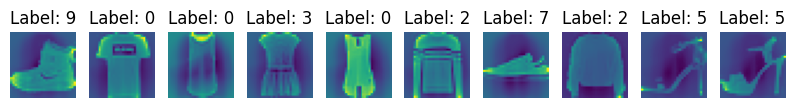

In [ ]:
# Display the first 10 images in the dataset
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X[i].reshape((28,28)), cmap='viridis')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.show()

*I displayed the first 10 images in a single row to get better visualization.*


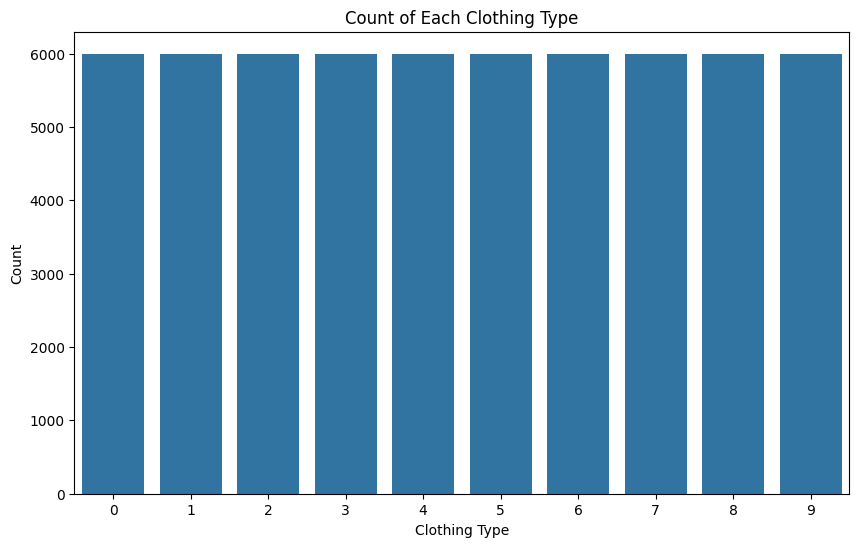

In [ ]:
# Plot the count of each clothing type in the dataset
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.title('Count of Each Clothing Type')
plt.xlabel('Clothing Type')
plt.ylabel('Count')
plt.show()

*The data set seems fairly balanced.  In other words, there are enough samples of each clothe. If not, we would have needed to re-balance the dataset.*

## Predict Clothes from Images


*For classification i will firstly use RandomForest Method below.*

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1166
           1       0.99      0.97      0.98      1213
           2       0.79      0.81      0.80      1232
           3       0.87      0.91      0.89      1209
           4       0.77      0.85      0.81      1159
           5       0.97      0.96      0.97      1217
           6       0.75      0.59      0.66      1178
           7       0.93      0.94      0.94      1215
           8       0.96      0.97      0.97      1178
           9       0.94      0.95      0.95      1233

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



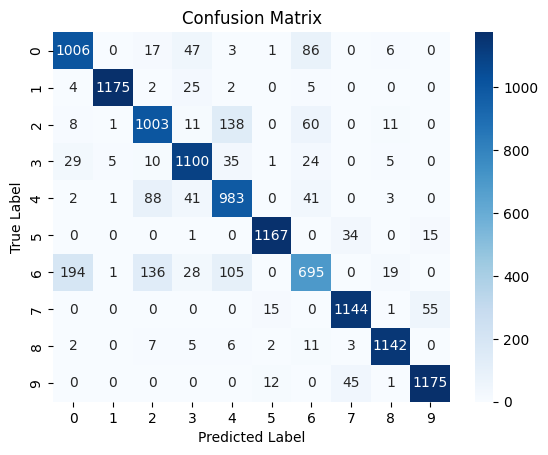

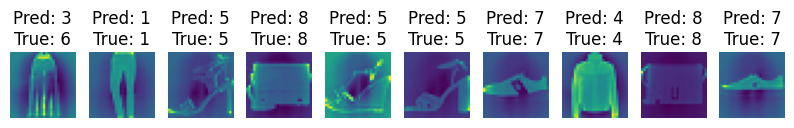

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize predictions
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), cmap='viridis')
    plt.title(f'Pred: {y_pred[i]}\nTrue: {y_test[i]}')
    plt.axis('off')
plt.show()


*Prcision: The ratio of correctly predicted positive observations to the total predicted positives.*

*Recall: The ratio of correctly predicted positive observations to all observations in the actual class.*

*F1 Score: The harmonic mean of precision and recall. It provides a balance between precision and recall.*

*Support: The number of actual occurrences of the class in the dataset.*

*The overall accuracy of **88%** indicates that the model performs well on the dataset and furthermore, high precision and recall for most classes suggest that the model is effective at distinguishing between different types of clothing.*

**Confusion Matrix:**
*The confusion matrix shows the number of correct and incorrect predictions for each class. Each row represents the true labels, and each column represents the predicted labels. For example 1175 instances of Class 1 (trousers) are correctly classified. For Class 6 (shirt) 695 of them are correctly classified while 194 of them are misclassified as tshirt-top (class 0) and 136 of them are misclassified as Class 2 (pullovers).*



Let's see how Support Vector Machines classify the data?

In [ ]:
%%time

# Build Support Vector Machines - Classifier model
from sklearn.svm import SVC

mdlSvmClt = SVC()
mdlSvmClt.fit(X_train, y_train)
y_test_pred = mdlSvmClt.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1166
           1       0.99      0.98      0.98      1213
           2       0.83      0.81      0.82      1232
           3       0.88      0.90      0.89      1209
           4       0.80      0.85      0.83      1159
           5       0.97      0.95      0.96      1217
           6       0.74      0.66      0.70      1178
           7       0.93      0.96      0.95      1215
           8       0.95      0.97      0.96      1178
           9       0.96      0.94      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: user 8min 39s, sys: 1.93 s, total: 8min 41s
Wall time: 8min 45s


### Simple Neural Networks and Deep Neural Networks

*Neural networks are powerful tools for machine learning and artificial intelligence, capable of learning complex patterns from data. Neurons are the basic units that receive input, process it, and pass on the output. Each neuron applies a function to its inputs to produce an output. Input layer receives the input data. Hidden layers process inputs from the previous layer. Output layer produces the output. There are different types of Neural Networks. I want to see firstly  Shallow Neural Network which is simple and then go on with Multi Layer Perceptron and Convolitional Neural Networks which are deep neural networks.*



#### Shallow Neural Network

In [ ]:
# Check unique values in labels
unique_labels = np.unique(y)
print("Unique label values:", unique_labels)

Unique label values: [-1  0  1]


In [ ]:
# Filter out invalid labels
valid_indices = (y >= 0) & (y <= 9)
X_score_images = X_score_images[valid_indices]
y = y[valid_indices]

# Check the shape after filtering
print("Shape after filtering invalid labels:", X_score_images.shape, y.shape)

Shape after filtering invalid labels: (48000, 784) (48000,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# Assuming X_score is a DataFrame or a NumPy array
# Check the shape of the data
print("Original shape:", X_score.shape)

# Convert to a NumPy array if it's a DataFrame
if isinstance(X_score, pd.DataFrame):
    X_score = X_score.values

# Remove the first column if it contains labels
X_score_images = X_score[:, 1:]

# Normalize the pixel values to be between 0 and 1
X_score_images = X_score_images / 255.0

# Assuming the labels are in the first column
y = X_score[:, 0].astype(int)

# Check for invalid label values
unique_labels = np.unique(y)
print("Unique label values:", unique_labels)

# Filter out invalid labels
valid_indices = (y >= 0) & (y <= 9)
X_score_images = X_score_images[valid_indices]
y = y[valid_indices]

# Check the shape after filtering
print("Shape after filtering invalid labels:", X_score_images.shape, y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_score_images, y, test_size=0.2, random_state=42)

# Reshape the data to fit the model input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Define the shallow neural network model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the input
    Dense(128, activation='relu'),  # One hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Original shape: (60000, 785)
Unique label values: [-1  0  1]
Shape after filtering invalid labels: (48000, 784) (48000,)
Epoch 1/10
960/960 [==============================] - 6s 5ms/step - loss: 0.3094 - accuracy: 0.9317 - val_loss: 0.1309 - val_accuracy: 0.9513
Epoch 2/10
960/960 [==============================] - 6s 6ms/step - loss: 0.1190 - accuracy: 0.9575 - val_loss: 0.1106 - val_accuracy: 0.9591
Epoch 3/10
960/960 [==============================] - 8s 8ms/step - loss: 0.1024 - accuracy: 0.9640 - val_loss: 0.1005 - val_accuracy: 0.9642
Epoch 4/10
960/960 [==============================] - 7s 7ms/step - loss: 0.0917 - accuracy: 0.9683 - val_loss: 0.0939 - val_accuracy: 0.9684
Epoch 5/10
960/960 [==============================] - 4s 4ms/step - loss: 0.0841 - accuracy: 0.9706 - val_loss: 0.0887 - val_accuracy: 0.9693
Epoch 6/10
960/960 [==============================] - 4s 4ms/step - loss: 0.0782 - accuracy: 0.9728 - val_loss: 0.0831 - val_accuracy: 0.9717
Epoch 7/10
960/960 [=======

#### Multi Layer Perceptron

In [ ]:
%%time

# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mdlNncClt = MLPClassifier()
mdlNncClt.fit(X_train, y_train)
y_test_pred = mdlNncClt.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1166
           1       0.98      0.99      0.98      1213
           2       0.80      0.80      0.80      1232
           3       0.91      0.87      0.89      1209
           4       0.78      0.84      0.81      1159
           5       0.97      0.95      0.96      1217
           6       0.72      0.67      0.70      1178
           7       0.94      0.95      0.95      1215
           8       0.97      0.95      0.96      1178
           9       0.95      0.96      0.95      1233

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

CPU times: user 3min 16s, sys: 1min 10s, total: 4min 27s
Wall time: 2min 39s


Accuracy is 88 again.

I want to make it more deeper by adding layers to my network.

In [ ]:
%%time

# Build Deep Neural Network - Additional Hidden Layers
from sklearn.neural_network import MLPClassifier
mdlDncClt = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncClt.fit(X_train, y_train)
y_test_pred = mdlDncClt.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1166
           1       0.97      0.99      0.98      1213
           2       0.78      0.83      0.80      1232
           3       0.89      0.88      0.88      1209
           4       0.81      0.81      0.81      1159
           5       0.97      0.95      0.96      1217
           6       0.72      0.71      0.72      1178
           7       0.93      0.96      0.94      1215
           8       0.97      0.95      0.96      1178
           9       0.95      0.95      0.95      1233

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

CPU times: user 3min 57s, sys: 1min 34s, total: 5min 32s
Wall time: 3min 29s


88% accuracy shows up again, i haven't seen any improvement until now.

Lets see how this performs on data that has not seen before.

In [ ]:
# Load Data for Scoring
X_score = scale(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/clothes/clothes.csv'))

In [ ]:
print(X_score.shape)  # This should print (num_samples, 785) if there's an extra column

(60000, 785)


In [ ]:
# If X_score is a Pandas DataFrame, convert to a NumPy array
if isinstance(X_score, pd.DataFrame):
    X_score = X_score.values

# Remove the first column
X_score_images = X_score[:, 1:]

(60000, 784)


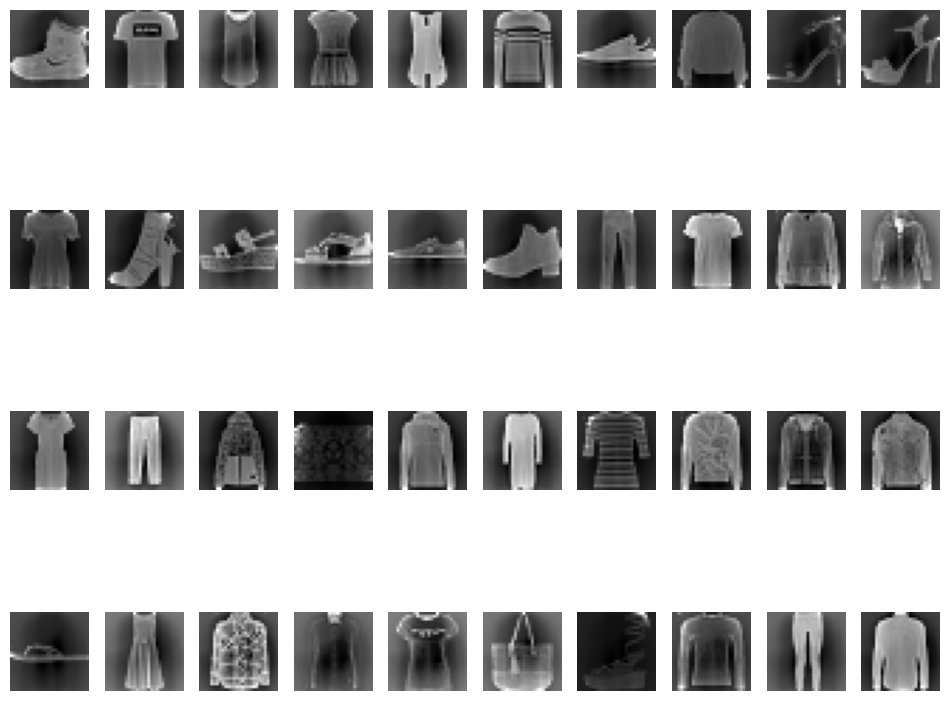

In [ ]:
import matplotlib.pyplot as plt

# Ensure the correct shape after removing the first column
print(X_score_images.shape)  # Should print (num_samples, 784)

# View New Clothe Images
plt.figure(figsize=(12,10))
col, row = 10, 4
for i in range(col*row):
    plt.subplot(row, col, i+1)
    plt.imshow(X_score_images[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
# Show predicted clothes
print('Predicted Clothes (Neural Network):')
for i in range(col*row):
    if np.mod(i,col) == 0:
        print('\n')
    print(mdlNncClt.predict(X_score_images)[i], end=' ')

Predicted Clothes (Neural Network):


9 0 0 3 0 2 7 2 5 5 

0 9 5 5 7 9 1 0 6 4 

3 1 4 8 4 3 0 2 4 4 

5 3 6 6 0 8 5 2 1 6 

#### Convolitional Neural Network

*How can we improve the accuracy? For example firstly i want to try Data Augmentation to increase the diversity of training set. I will rotate, zoom, flip the images.*

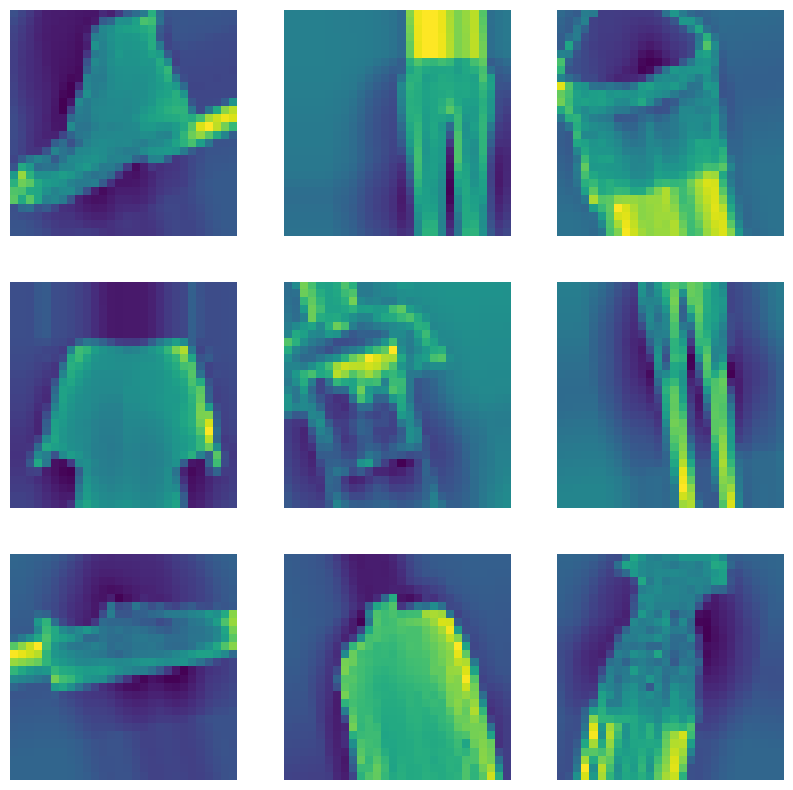

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train.reshape(-1, 28, 28, 1))

# Example of augmented images
plt.figure(figsize=(10,10))
for X_batch, y_batch in datagen.flow(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=9):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='viridis')
        plt.axis('off')
    break
plt.show()


Now i want to see how Convolutional Neural Network (CNN) can improve my accuracy. CNNs are designed to handle spatial data like images and videos, capturing spatial hierarchies in the data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_split=0.2, batch_size=32)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
1200/1200 [==============================] - 52s 40ms/step - loss: 0.4580 - accuracy: 0.8342 - val_loss: 0.3657 - val_accuracy: 0.8687
Epoch 2/10
1200/1200 [==============================] - 42s 35ms/step - loss: 0.3114 - accuracy: 0.8854 - val_loss: 0.3102 - val_accuracy: 0.8919
Epoch 3/10
1200/1200 [==============================] - 40s 34ms/step - loss: 0.2590 - accuracy: 0.9056 - val_loss: 0.2926 - val_accuracy: 0.8928
Epoch 4/10
1200/1200 [==============================] - 41s 34ms/step - loss: 0.2225 - accuracy: 0.9173 - val_loss: 0.2856 - val_accuracy: 0.8982
Epoch 5/10
1200/1200 [==============================] - 41s 34ms/step - loss: 0.1896 - accuracy: 0.9281 - val_loss: 0.2995 - val_accuracy: 0.8909
Epoch 6/10
1200/1200 [==============================] - 40s 33ms/step - loss: 0.1626 - accuracy: 0.9393 - val_loss: 0.3040 - val_accuracy: 0.9014
Epoch 7/10
1200/1200 [==============================] - 40s 34ms/step - loss: 0.1360 - accuracy: 0.9492 - val_loss: 0.2883 -

Accuracy is improved to 90%.

*Interesting Part: It's unusual for a shallow neural network to outperform a more complex model like a Convolutional Neural Network (CNN) or a Multi-Layer Perceptron (MLP) with multiple layers, especially on image data. However my result are 97% for SNN, 90% for CNN and 88% for MLP. I think it can be because of the fact that a simpler model might generalize better if the dataset is small or if there is not enough variability in the data to justify a deeper model.*


utexas_ds_orie_divider_gray.png

### Cross Validation

In addition to the typical train/test split, it helps to run multiple experiments in which the train/test data is different.  Suppose the data is being split train-80%/test-20%, then there are 5 different experiments that can be run in which each data point is part of the test set at least once.  So, let's break up the data into multiple train/test splits and **cross-validate** across all to make sure the model works well.

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (60000, 784)
Shape of y: (48000,)


In [ ]:
# Assuming X_score is your original dataset
# Ensure X_score includes both the features and labels
# Remove the first column from X_score to get the features
X = X_score[:, 1:]

# Ensure the labels are in the first column
y = X_score[:, 0].astype(int)

# Check for any missing or mismatched data
print("Shape of X after correction:", X.shape)
print("Shape of y after correction:", y.shape)

Shape of X after correction: (60000, 784)
Shape of y after correction: (60000,)


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming mdlDncClt is your model (e.g., an instance of a neural network classifier or any other model)
# Perform 5-fold cross-validation
scores = cross_val_score(mdlDncClt, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.94783333 0.95641667 0.95275    0.95475    0.95141667]
Mean cross-validation score: 0.9526333333333333


Cross-validation scores provide a comprehensive view of a model's performance, consistency, and generalization ability. 95% is a great score.